___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Maestra :Sara Eugenia Rodríguez </Strong>
- <Strong> Alumno : Patricio Villanueva Gio </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-981-32-9294-9_28/MediaObjects/483279_1_En_28_Fig1_HTML.png</p>

### <font color= #2E9AFE> Tema: Regresión Logística</font>

La regresión logística es un algoritmo de machine learning para clasificación que es usado para predecir la probabilidad de variables dependientes categóricas. 

En la regresión logística la variable dependiente es una variable binaria que contiene como 1 (sí, ganar, etc) o 0 (no, perder, etc). 

La regresión logística es también conocida como la "Regresión logística binomial", la cual es basada en la función sigmoidal donde la salida es la probabilidad y la entrada puede ir desde -infinito a +infinito. 

**Supuestos de regresión logística**

- La regresión logística binaria requiere que la variable dependiente sea binaria.
- Para una regresión binaria, el nivel de factor 1 de la variable dependiente debe representar el resultado deseado.
- Solo deben incluirse las variables significativas.
- Las variables independientes deben ser independientes entre sí. Es decir, el modelo debe tener poca o ninguna multicolinealidad.
- Las variables independientes están relacionadas linealmente con las probabilidades logarítmicas.
- La regresión logística requiere tamaños de muestra bastante grandes.


**Ejercicio**

Se tienen datos de campañas de marketing (llamadas telefónicas) de un banco portugués. Se tiene la necesidad de predecir si un cliente va a suscribirse a un depósito a término (variable a predecir). 

Un depósito a término es un depósito que un banco ofrece con una tasa fija en la cual el dinero se regresará en cierto tiempo de madurez. 


### Los datos

Los datos se obtuvieron del repositorio de UCI Machine learning https://archive.ics.uci.edu/ml/datasets/bank+marketing
Consiste de 41188 datos. 


Variables de entrada:

- age (numerica)
- job : tipo de trabajo (categorica: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : estado marital (categorica: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorica: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- housing: tiene hipoteca? (categorica: 'no','yes','unknown')
- loan: tiene préstamos personales? (categorica: 'no','yes','unknown')
- contact: tipo de comunicación (categorical: 'cellular','telephone')
- month:último mes de contacto del año (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: último día de contacto de la semana (categorical: 'mon','tue','wed','thu','fri')
- duration: duración en segundos de la llamada. 
- campaign: número de llamadas realizadas durante esta campaña y para este cliente (numeric, includes last contact)
- pdays: número de días que pasaron después de que el cliente fue contactado de la campaña anterior (numeric; 999 means client was not previously contacted)
- previous: número de contactos realizados antes de esta campaña y para este cliente (numeric)
- poutcome: resultado de la campaña de marketing anterior (categorical: 'failure','nonexistent','success')
- emp.var.rate: tasa de variación del empleo - indicador trimestral (numeric)
- cons.price.idx: índice de precios al consumidor - indicador mensual  (numeric)
- cons.conf.idx: índice de confianza del consumidor - indicador mensual (numeric)
- euribor3m: euribor 3 month rate - daily indicator (numeric)


Variable de salida:
- y - se suscribió el cliente a un depósito a término? (binario: 'yes','no')

In [1]:
#Importar librerías
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
#importar datos
data = pd.read_csv('bank_full.csv')
#Quitar valores nulos
data = data.dropna()
print(data.shape)

(41188, 21)


In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


### Exploración de datos

In [4]:
#cómo se ve la distribución de nuestra variable de salida
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [5]:
4640/36548

0.126956331399803

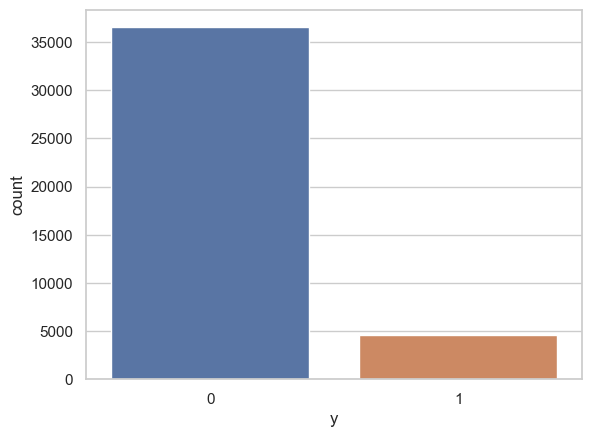

In [6]:
#graficando la distribucion de la variable a predecir
sns.countplot(x="y",data=data)
plt.show()


Los datos de salida están imbalanceados

Vamos a ver la distribución de las variables contra la variable de salida "Y" para empezar a ver qué variables podemos quitar o dejar

# si cambia distribución dejar variable

Text(0, 0.5, 'Proporcion de clientes')

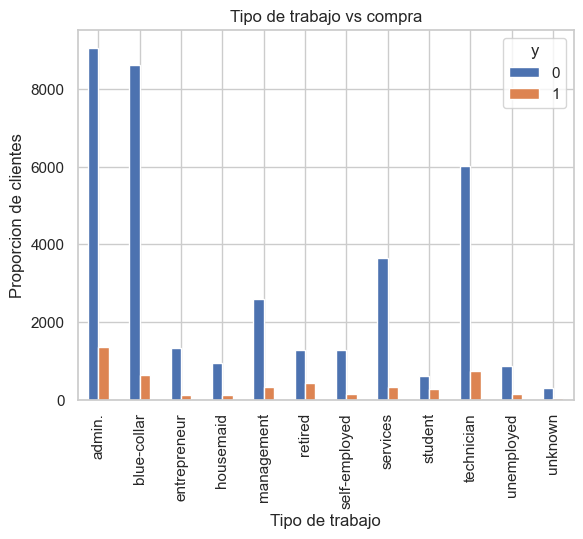

In [7]:
#Analizar variable Y vs tipo de trabajo
pd.crosstab(data.job, data.y).plot(kind="bar") 
plt.title("Tipo de trabajo vs compra")
plt.xlabel("Tipo de trabajo")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Proporcion de clientes')

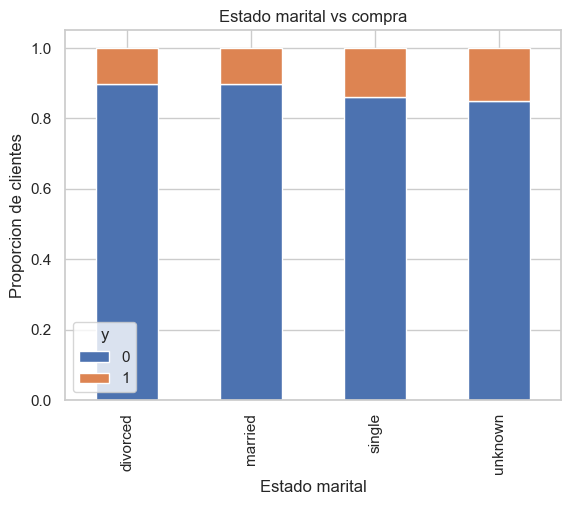

In [8]:
#Analizar variable Y vs estatus marital
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Estado marital vs compra')
plt.xlabel('Estado marital')
plt.ylabel('Proporcion de clientes')

No cambia ditribución, sacar variable 

El estado marital no parece ser un predictor bueno para predecir la compra

Text(0, 0.5, 'Proporcion de clientes')

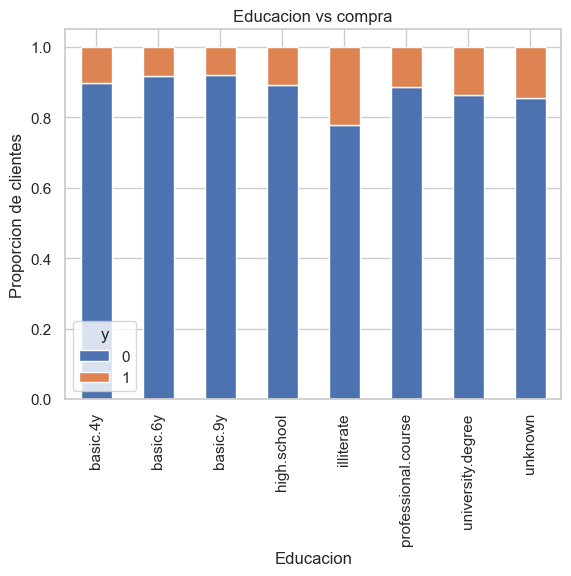

In [9]:
#Analizar variable Y vs educación
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Educacion vs compra')
plt.xlabel('Educacion')
plt.ylabel('Proporcion de clientes')

La educación parece ser un buen predictor para la variable a predecir

Text(0, 0.5, 'Proporcion de clientes')

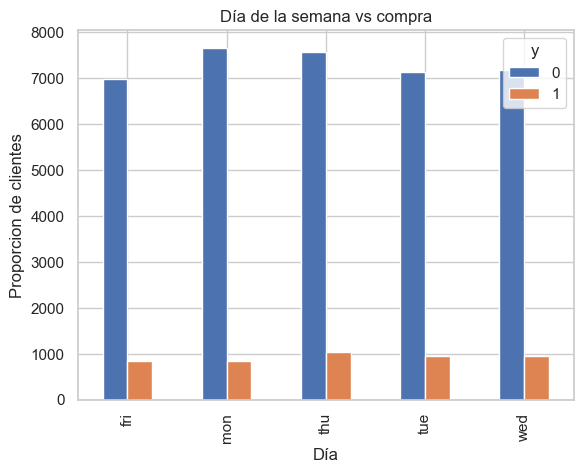

In [10]:
#Analizar variable Y vs día de la semana
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Día de la semana vs compra')
plt.xlabel('Día')
plt.ylabel('Proporcion de clientes')

El día de la semana puede no ser muy buen predictor

Text(0, 0.5, 'Proporcion de clientes')

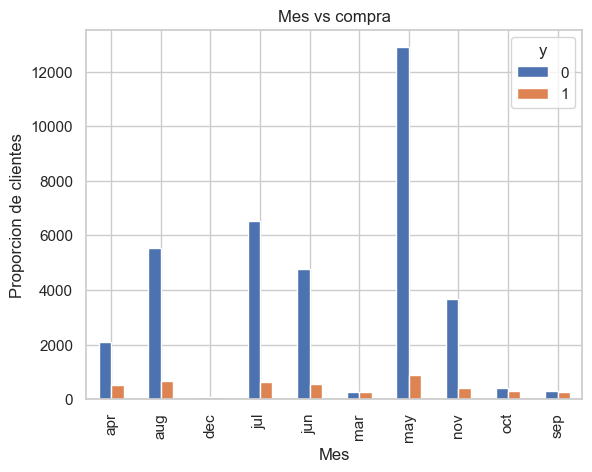

In [11]:
#Analizar variable Y vs mes
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Mes vs compra')
plt.xlabel('Mes')
plt.ylabel('Proporcion de clientes')

El mes puede ser un buen predictor

Text(0, 0.5, 'Frecuencia')

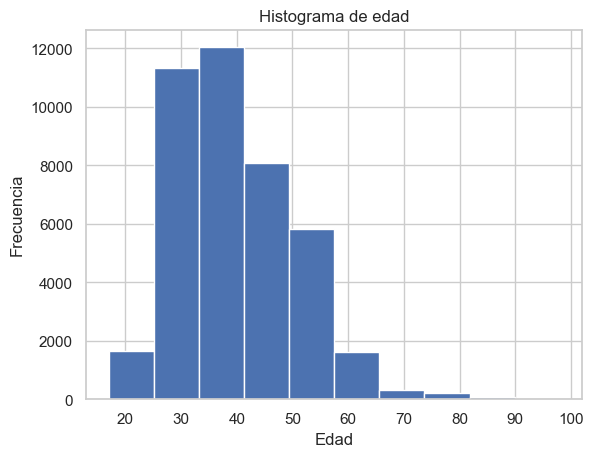

In [12]:
#distribución de las edades
data.age.hist()
plt.title('Histograma de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

La mayoría de los clientes del banco están entre los 30-40 años

### Limpieza de datos


In [13]:
#crear variables dummies de las variables categóricas
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data2 = data.copy()
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data2.join(cat_list)
    data2=data1

data_vars=data2.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [14]:
data2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [15]:
#quitar las variables categóricas originales (antes del encoding)
data_final=data2[to_keep]
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'mo

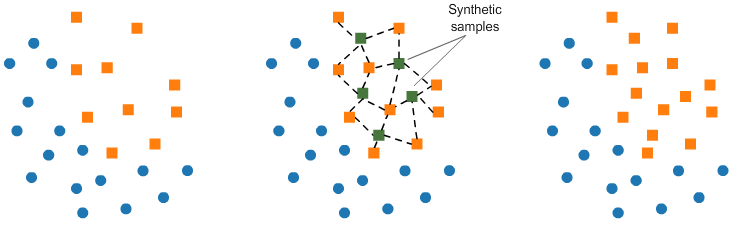

In [16]:
#Sobremuestreo Synthetic Minority Oversampling Technique (SMOTE)
from IPython.display import Image
Image(filename="SMOTE.png")

Recordar que el balanceo de clases es después de dividir los datos en train/test

In [17]:
#Dividir X de Y
X = data_final.loc[:,data_final.columns!='y']
y = data_final.loc[:,data_final.columns=='y']

#SMOTE
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)

#Dividir en test y train para hacer el oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

#Hacer oversampling en datos del train
os_data_X, os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])



Con esto ya los datos están balanceados. Si se fijan sólo hicimos el oversampling en los datos de entrenamiento, ninguna de la información de los datos de test fueron usados para crear muestras sintéticas, por lo tanto ninguna información del test se filtra al entrenamiento del modelo. 

#### Selección de variables

Usamos el algoritmo de Recursive Feature Elimination (RFE) para seleccionar variables considerando cada vez menos y menos conjuntos de variables. 

In [18]:
#Separar X de Y
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#crear modelo de regresión logística
model = LogisticRegression()

#crear el recursive feature elimination para la regresión logística
rfe = RFE(model, n_features_to_select=20, verbose=0) #vamos a dejar sólo 20 variables
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print("Características seleccionadas: %s" % rfe.support_)
print("Rank de las características: %s" % rfe.ranking_)

C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mpper\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Características seleccionadas: [False False False False False False False False False False False False
 False False False False False False False False False False  True  True
 False False  True  True  True  True False  True  True  True False False
 False  True  True  True  True  True  True False False False False False
 False False False False False False False  True  True  True  True  True
 False False False]
Rank de las características: [40 37 35 41 36 32 33 39 31 38 23 16 18 17 22 43 21 20 30 19 25 24  1  1
  2  3  1  1  1  1 42  1  1  1  5  4 44  1  1  1  1  1  1  7  6 14 11 27
 12 15 34 13 10 29 28  1  1  1  1  1  9  8 26]


In [19]:
os_data_X.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

El RFE nos ayudó a seleccionar las siguientes variables:
'marital_divorced', 'marital_married', 'education_basic.4y', 'education_basic.6y','education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree',
'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
'day_of_week_tue', 'day_of_week_wed'

In [20]:
cols=['marital_divorced', 'marital_married', 'education_basic.4y', 'education_basic.6y','education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
X=os_data_X[cols]
y=os_data_y['y']

In [21]:
y.unique()

array([0, 1], dtype=int64)

In [22]:
# Import the necessary library
import statsmodels.api as sm

# Create a logistic regression model using sm.Logit
logit_model = sm.Logit(y, X)

# Fit the model using the 'bfgs' optimization method
result = logit_model.fit(method='bfgs')

# Print the summary of the regression results
print(result.summary2())


         Current function value: 0.456343
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                                       Results: Logit
Model:                        Logit                     Pseudo R-squared:          0.342     
Dependent Variable:           y                         AIC:                       46707.3020
Date:                         2023-10-17 13:32          BIC:                       46875.3039
No. Observations:             51134                     Log-Likelihood:            -23335.   
Df Model:                     18                        LL-Null:                   -35443.   
Df Residuals:                 51115                     LLR p-value:               0.0000    
Converged:                    0.0000                    Scale:                     1.0000    
---------------------------------------------------------------------------------------------
                               Coef.    Std.Err.      z     

C:\Users\mpper\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


p value > 0.05, significa que podemos quitar la variable

In [23]:
np.exp(-0.3758)

0.6867396672418716

Una persona divorciada, tiene 0.68 veces más probabilidad de adquirir un term deposit

Los p-values para la mayoría de las variables son menores a 0.05, excepto por 2 variables, por lo tanto las vamos a quitar. 

In [24]:
cols=['marital_divorced', 'marital_married', 'education_basic.4y', 'education_basic.6y','education_basic.9y', 'education_high.school', 'education_professional.course', 'education_university.degree',
       'education_unknown', 'housing_no', 'housing_yes', 'loan_no',
       'loan_yes', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
X=os_data_X[cols]
y=os_data_y['y']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.455126
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.343     
Dependent Variable:      y                    AIC:                  46580.8317
Date:                    2023-10-17 13:32     BIC:                  46739.9914
No. Observations:        51134                Log-Likelihood:       -23272.   
Df Model:                17                   LL-Null:              -35443.   
Df Residuals:            51116                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

Una vez que terminamos de seleccionar variables, creamos el modelo de regresión logístcia

In [25]:
#Regresión logítica con sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#Dividir test y train para entrenar modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#Inicializar objeto
logreg = LogisticRegression()
#Ajustar modelo a datos de entrenamiento
logreg.fit(X_train, y_train)

LogisticRegression()

In [26]:
#Predecir con datos del test
y_pred = logreg.predict(X_test)


Para clasificación usamos otras métricas diferentes a las de regresión

In [27]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7600   66]
 [1168 6507]]


El resultado nos dice que tenemos 7600+6508=14108 predicciones correctas y 1167+66=1234 predicciones incorrectas 

In [28]:
#Calcular Accuracy
print('Accuracy de la regresión logística en los datos de test: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy de la regresión logística en los datos de test: 0.9196


In [29]:
(7600+6508)/(7600+66+1167+6508)

0.919627142950264

#### Cross Validation

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Preparamos el cross validation
cv = KFold(n_splits=10,random_state=1, shuffle=True)

# crear modelo
model = LogisticRegression()
# evaluar modelo
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
# Performance
print('Accuracy: %.4f' % (np.mean(scores)))

Accuracy: 0.9202


**Ventajas de la regresión logística**

- Fácil de implementar, interpretar y muy eficiente de entrenar
- No sólo provee la medida de la importancia (tamaño) del coeficiente, sino que también nos dice la dirección de la asociación (positiva/negativa).
- Es muy rápida clasificando datos nuevos
- Tiene buena precisión para datos simples y funciona bien cuando los datos son linealmente separables
- Se pueden interpretar los coeficientes del modelo como indicadores de importancia de variables
- La regresión logística hace poco sobre-ajuste cuando los datos son simples pero puede sobre-ajustar cuando tenemos datos de alta dimensionalidad. 

**Desventajas de la regresión logística**
- Si el número de observaciones (filas) es menor que el número de variables (columnas) la regresión logística no se debe usar, sino lo que puede pasar es que sobre ajuste
- La mayor limitación de la regresión logística es que asume una relación lineal entre variables dependientes y variables independientes. 
- No es un buen modelo si no tenemos datos linealmente separables. 
- Es difícil obtener resultados cuando tenemos relaciones de datos complejos, las redes neuronales pueden mejorar mucho este algoritmo